## 工具导入和数据读取

### 工具导入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

### 数据读取

In [2]:
"""
读取数据集
"""
test_data = pd.read_csv('./data_format1/test_format1.csv')
train_data = pd.read_csv('./data_format1/train_format1.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv')

#user_info = pd.read_csv('./data_format1/user_info_format1.csv').drop_duplicates()
#user_log = pd.read_csv('./data_format1/user_log_format1.csv').rename(columns={"seller_id":'merchant_id'})


### 数据集样例查看

In [3]:
train_data.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [4]:
test_data.head(5)

,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


In [5]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [6]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## 单变量数据分析

### 数据类型和数据大小

**用户信息数据**

1. 数据集中共有2个float64类型和1个int64类型的数据
2. 数据大小9.7MB
3. 数据集共有424170条数据

In [7]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


**用户行为数据**

1. 数据集中共有6个int64类型和1个float64类型的数据
2. 数据大小2.9GB
3. 数据集共有54925330条数据

In [8]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   item_id      int64  
 2   cat_id       int64  
 3   seller_id    int64  
 4   brand_id     float64
 5   time_stamp   int64  
 6   action_type  int64  
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


**用户购买训练数据**

1. 数据均为int64类型
2. 数据大小6MB
3. 数据集共有260864条数据

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


### 缺失值查看

**用户信息数据缺失**

**年龄缺失**：

1. 年龄值为空的缺失率为0.5%
2. 年龄值缺失或者年龄值为缺省值0
3. 共计95131条数据

In [10]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

In [11]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [12]:
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


**性别缺失**
1. 性别值为空的缺失率 1.5%
2. 性别值缺失或者性别为缺省值2
3. 共计16862条数据

In [13]:
(user_info.shape[0]-user_info['gender'].count())/user_info.shape[0]

0.01517316170403376

In [14]:
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [15]:
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


**年龄或者性别其中有一个有缺失**

共计106330条数据

In [16]:
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

**用户行为日志信息**

brand_id字段有91015条缺失数据

In [17]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

## 观察数据分布

### 整体数据统计信息

In [18]:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476179,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [19]:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,5.483432e+07,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,4.153348e+03,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,2.397679e+03,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2.027000e+03,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4.065000e+03,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6.196000e+03,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8.477000e+03,1.112000e+03,3.000000e+00


### 查看正负样本的分布

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

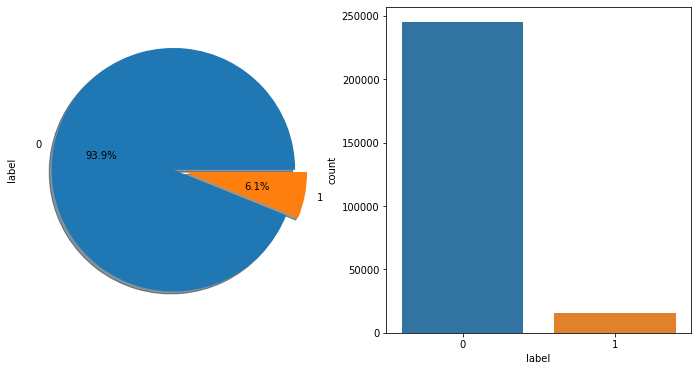

In [20]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot('label',data=train_data,ax=axe[1],)

从上图可以看出，样本的分布不均衡，需要采取一定的措施处理样本不均衡的问题：

* 类似欠采样,将一份正样本和多分负样本组合成多分训练集,训练多个模型后求平均
* 调整模型的权重

## 探查店铺、用户、性别以及年龄对复购的影响

### 查看不同商家与复购的关系

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


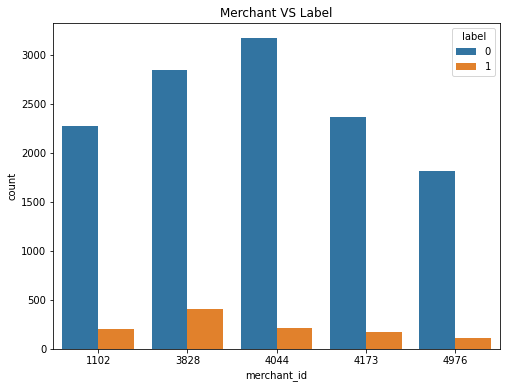

In [21]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
ax = sns.countplot('merchant_id',hue='label',data=train_data_merchant)
for p in ax.patches:
    height = p.get_height()

从图可以看出不同店铺有不同复购率，可能与不同店铺售卖的商品有关，以及店铺的运营有关。

### 查看店铺复购概率分布

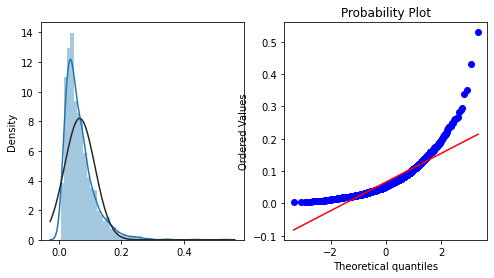

In [22]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0] 
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(merchant_repeat_buy, plot=plt)

可以看出不同店铺有不同复购率，大致在0-0.3之间

### 查看用户大于一次复购概率分布

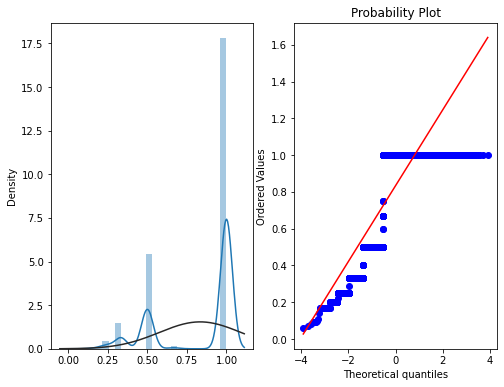

In [23]:
user_repeat_buy = [rate for rate in train_data.groupby(['user_id'])['label'].mean() if rate <= 1 and rate > 0] 

plt.figure(figsize=(8,6))

ax=plt.subplot(1,2,1)
sns.distplot(user_repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(user_repeat_buy, plot=plt)

可以看出近6个月，用户复购率很小，基本买一次为主

In [24]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')

### 查看用户性别与复购的关系

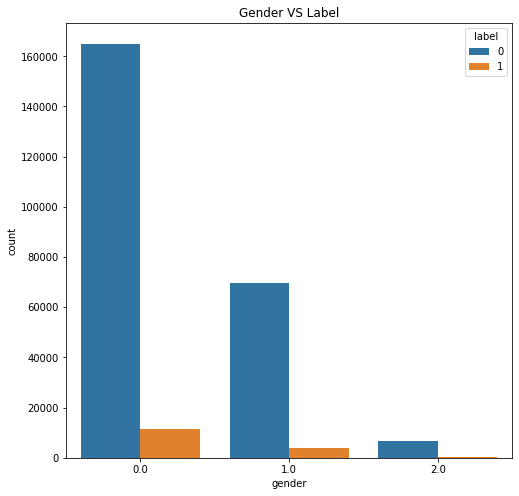

In [25]:
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()

### 查看用户性别复购的分布

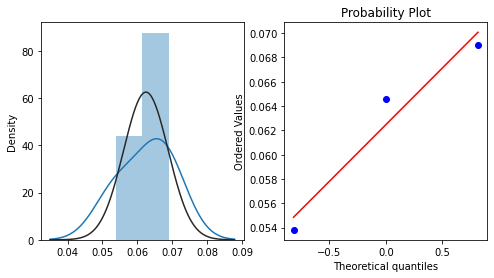

In [26]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出男女的复购率不一样

### 查看用户年龄与复购的关系

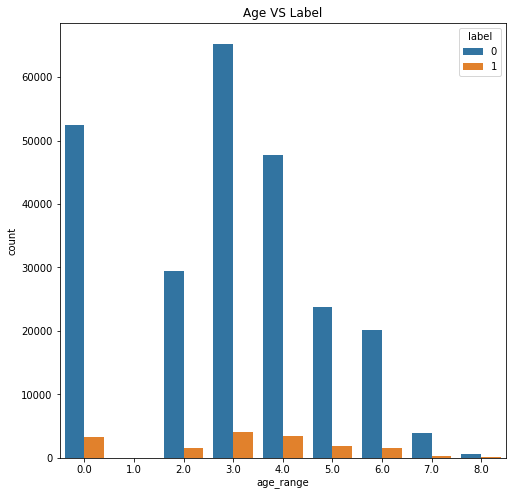

In [27]:
plt.figure(figsize=(8,8))
plt.title('Age VS Label')
ax = sns.countplot('age_range',hue='label',data=train_data_user_info)

### 查看用户年龄复购的分布

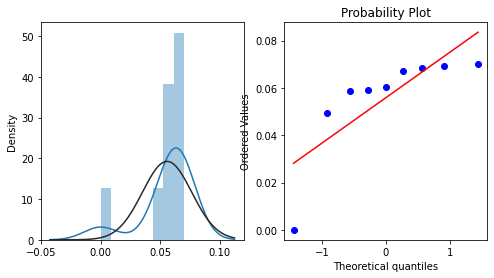

In [28]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['age_range'])['label'].mean()] 

plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

可以看出不同年龄段，复购概率不同